<a href="https://colab.research.google.com/github/Junseokee/Deep_Learning/blob/main/220915_LSTM_%EC%98%81%ED%99%94_%EA%B8%8D%EB%B6%80%EC%A0%95_%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 네이버 영화 긍부정 분류

In [2]:
# konlpy 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install konlpy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency 

In [3]:
import os
import zipfile
import urllib
import re
import pandas as pd

In [4]:
from konlpy.tag import Okt
okt = Okt()

In [5]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt',
                          filename ='ratings_train.txt')

urllib.request.urlretrieve('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt',
                          filename = 'ratings_test.txt')

('ratings_test.txt', <http.client.HTTPMessage at 0x7fb4bdf8e950>)

In [6]:
df_train = pd.read_csv('/content/ratings_train.txt',encoding='utf-8', sep="	")

In [7]:
df_test = pd.read_csv('/content/ratings_test.txt',encoding='utf-8', sep="	")

In [8]:
df_train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [9]:
df_test.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
# # 중복제거를 위한 중복 체크
# train['document'].nunique(), train['label'].nuniqye()
# train.drop_duplicates(subset=['document'],
#                       inplace = True)


In [12]:
df_train.isna().sum()

id          0
document    5
label       0
dtype: int64

In [55]:
df_train = df_train.dropna()

In [56]:
df_test = df_test.dropna()

In [57]:
train = df_train.drop(['id'],axis=1)
train.head()

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [58]:
test = df_test.drop(['id'],axis=1)

In [59]:
from google.colab import files
myfile = files.upload()

Saving korean_stopword.csv to korean_stopword (1).csv


In [60]:
k_stopword = pd.read_csv('/content/korean_stopword.csv')
#list():
stopword = list(k_stopword['불용어'])+['을','은','를','이가','과','의','는','에','가','이','은','들','좀','잘','잘','걍','도','들','으로','자','에','와','한','하다','있다','되다','에서']

stopword[:5]

['이', '있', '하', '것', '들']

In [61]:
import re
train["document"] = train["document"].str.replace(pat=r'[^a-zA-Zㄱ-ㅣ가-힣0-9 ]', repl=r' ', regex=True)
train.head()

,document,label
0,아 더빙 진짜 짜증나네요 목소리,0
1,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [62]:
import re
test["document"] = test["document"].str.replace(pat=r'[^a-zA-Zㄱ-ㅣ가-힣0-9 ]', repl=r' ', regex=True)
test.head()

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,3D만 아니었어도 별 다섯 개 줬을텐데 왜 3D로 나와서 제 심기를 불편하게 하죠,0


In [63]:
train.astype({'document':str})
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  149995 non-null  object
 1   label     149995 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [64]:
train.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            149990, 149991, 149992, 149993, 149994, 149995, 149996, 149997,
            149998, 149999],
           dtype='int64', length=149995)

In [65]:
okt.morphs(train.loc[25857]['document'], stem=True)

KeyError: ignored

In [66]:
from konlpy.tag import Okt
okt =Okt()

morphs_lst = []
for i in train.index:
  morphs = ""
  morph = okt.morphs(train.loc[i]['document'], stem=True)
  for txt in morph:
    if txt not in stopword:
    #mophs.append(txt)
      morphs = morphs + " " + txt
  morphs_lst.append(morphs)
train['morphs'] = morphs_lst
train.head()

,document,label,morphs
0,아 더빙 진짜 짜증나네요 목소리,0,아 더빙 진짜 짜증나다 목소리
1,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1,흠 포스터 보고 초딩 영화 줄 오버 연기 조차 가볍다 않다
2,너무재밓었다그래서보는것을추천한다,0,너 무재 밓었 다그 래서 보다 추천 다
3,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0,교도소 이야기 구먼 솔직하다 재미 없다 평점 조정
4,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이 몬페 익살스럽다 연기 돋보이다 영화 스파이더맨 늙다 보이다 커스틴 던스트 너...


In [137]:
from konlpy.tag import Okt
okt =Okt()

morphs_lst = []
for i in test.index:
  morphs = ""
  morph = okt.morphs(test.loc[i]['document'], stem=True)
  for txt in morph:
    if txt not in stopword:
    #mophs.append(txt)
      morphs = morphs + " " + txt
  morphs_lst.append(morphs)
test['morphs'] = morphs_lst
test.head(10)

,document,label,morphs
0,굳 ㅋ,1,굳다 ㅋ
1,GDNTOPCLASSINTHECLUB,0,GDNTOPCLASSINTHECLUB
2,뭐야 이 평점들은 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0,뭐 야 평점 나쁘다 않다 10 짜다 더욱 아니다
3,지루하지는 않은데 완전 막장임 돈주고 보기에는,0,지루하다 않다 완전 막장 임 돈 주다 보기 에는
4,3D만 아니었어도 별 다섯 개 줬을텐데 왜 3D로 나와서 제 심기를 불편하게 하죠,0,3 D 만 아니다 별 다섯 주다 왜 3 D 나오다 심기 불편하다
5,음악이 주가 된 최고의 음악영화,1,음악 주가 최고 음악 영화
6,진정한 쓰레기,0,진정하다 쓰레기
7,마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가 고개를 젖게한다,0,마치 미국 애니 튀어나오다 창의력 없다 로봇 디자인 부터가 고개 젖다
8,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한c...,0,갈수록 개판 중국영화 유치하다 내용 없다 폼 잡다 끝나다 안되다 무기 유치하다 c...
9,이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But 모든 사람이 그렇지는 않네,1,이별 아픔 뒤 찾아오다 새롭다 인연 기쁨 But 모든 그렇다 않다


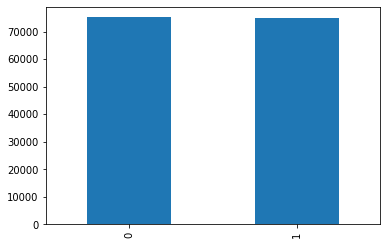

In [69]:
train['label'].value_counts().plot(kind ='bar')

In [70]:
train['label'].value_counts()

0    75170
1    74825
Name: label, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split

x = train['document']
y = train['label']


In [86]:
print('학습 데이터의 수 : ', x.shape[0])

학습 데이터의 수 :  149995


In [87]:
print('학습데이터의 라벨 분포')
y.value_counts()

학습데이터의 라벨 분포


0    75170
1    74825
Name: label, dtype: int64

In [88]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 정수 인코딩(사전만들기)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [90]:
print(tokenizer.word_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [92]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 3보다 작은 단어ㅢ 개수 카운트
total_freq = 0 # 훈련데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈더수가 3보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  # 단어의 등장 빈도수가 3보다 작으면
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('단어 집합의 크기 : ', total_cnt)
print('등장빈도가 %s번 이하인 희귀 단어의 수 : %s'%(threshold-1,rare_cnt))
print("단어 집합에서 희귀 단어의 비율: ",(rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : ',\
      (rare_freq / total_freq)*100)

단어 집합의 크기 :  294268
등장빈도가 1번 이하인 희귀 단어의 수 : 222094
단어 집합에서 희귀 단어의 비율:  75.47337800916172
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :  18.866389057368625


In [93]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2 (사전에 없는단어)
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 : ', vocab_size)

단어 집합의 크기 :  72176


문서의 최대 길이 :  146
문서의 평균 길이 :  35.15690523017434


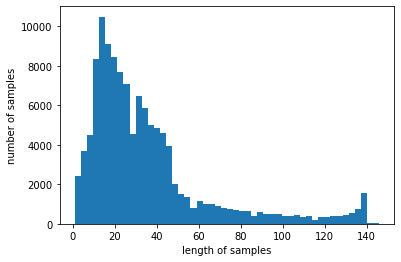

In [94]:
# 패딩 범위를 지정해주기 위함
import matplotlib.pyplot as plt

print('문서의 최대 길이 : ', max(len(l) for l in x_train))
print('문서의 평균 길이 : ', sum(map(len,x_train))/len(x_train))
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [95]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
      cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%\
    (max_len, (cnt / len(nested_list)) *100))

In [96]:
max_len = 140
below_threshold_len(max_len, x)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.63255441848062
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.63322110737025
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.63388779625987
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.63455448514951
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.63522117403913
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.63588786292875
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.63655455181839
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.63722124070803
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.63788792959765
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.63855461848728
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.63922130737691
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.63988799626654
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.64055468515618
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.6412213740458
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.64188806293544
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.64255475182506
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.64322144071468
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.64388812960432
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.64455481849396
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.64522150738358
전체 샘플 중 길이가 140 이하인 샘플의 비율: 96.6458881962732


In [103]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(x)
x_train = tokenizer.texts_to_sequences(x)

In [104]:
from tensorflow.keras.preprocessing import sequence
x_train =sequence.pad_sequences(x_train ,maxlen=max_len)
print('x_train 크기 : ', x_train.shape)

x_train 크기 :  (149995, 140)


In [105]:
x_test = test['document']
y_test = test['label']
x_test = tokenizer.texts_to_sequences(x_test)
x_test=sequence.pad_sequences(x_test,maxlen=max_len)
print('X_test 크기 : ', x_test.shape)

X_test 크기 :  (49997, 140)


In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding  

model = Sequential()

model.add(Embedding(input_dim = vocab_size, output_dim = 64))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          4619264   
                                                                 
 lstm (LSTM)                 (None, None, 64)          33024     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,665,793
Trainable params: 4,665,793
Non-trainable params: 0
_________________________________________________________________


In [107]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 검증 데이터 손실(val_loss)이 증가하면, 
# 과적합 징후므로 검증 데이터 손실이 4회 증가하면 
# 학습을 조기 종료(Early Stopping)합니다. 
es = EarlyStopping(monitor='val_loss', 
                   mode='min', verbose=1, patience=10)
# ModelCheckpoint를 사용하여 검증 데이터의 
# 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다.
mc = ModelCheckpoint('best_model_LSTM.h5', 
                     monitor='val_acc', mode='max', 
                     verbose=2, save_best_only=True)

In [108]:
history = model.fit(x_train, y, 
                    epochs=30, 
                    callbacks=[es, mc], 
                    validation_split = 0.2)

Epoch 1/30
3750/3750 [==============================] - ETA: 0s - loss: 0.4158 - acc: 0.7960
Epoch 1: val_acc improved from -inf to 0.83283, saving model to best_model_LSTM.h5
3750/3750 [==============================] - 66s 15ms/step - loss: 0.4158 - acc: 0.7960 - val_loss: 0.3600 - val_acc: 0.8328
Epoch 2/30
3749/3750 [============================>.] - ETA: 0s - loss: 0.2581 - acc: 0.8846
Epoch 2: val_acc did not improve from 0.83283
3750/3750 [==============================] - 54s 15ms/step - loss: 0.2581 - acc: 0.8846 - val_loss: 0.3883 - val_acc: 0.8277
Epoch 3/30
3749/3750 [============================>.] - ETA: 0s - loss: 0.1770 - acc: 0.9198
Epoch 3: val_acc did not improve from 0.83283
3750/3750 [==============================] - 54s 15ms/step - loss: 0.1771 - acc: 0.9198 - val_loss: 0.4551 - val_acc: 0.8221
Epoch 4/30
3749/3750 [============================>.] - ETA: 0s - loss: 0.1303 - acc: 0.9385
Epoch 4: val_acc did not improve from 0.83283
3750/3750 [=====================

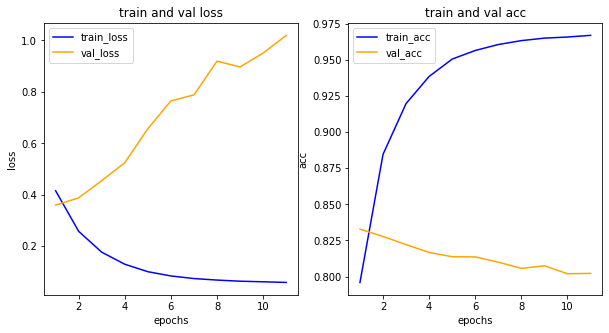

In [109]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [110]:
from tensorflow.keras.models import load_model
loaded_model_LSTM = load_model('best_model_LSTM.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model_LSTM.evaluate(x_test, y_test)[1]))

1563/1563 [==============================] - 10s 6ms/step - loss: 0.3724 - acc: 0.8236

 테스트 정확도: 0.8236


In [149]:
import numpy as np
loaded_model_LSTM = load_model('best_model_LSTM.h5')

def movie_pred(new_sentence):
  new_sentence = okt.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = sequence.pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model_LSTM.predict(pad_new)) # 예측
  if score >= 0.5:
    pred = '긍정'
  else:
    pred = '중립 또는 부정'
  print(f'해당 문장은 {pred} 리뷰 입니다.')

In [150]:
movie_pred(' 와 이렇게 재밌어서 중간에 한 번도 시계 안 본 한국 영화는 ㄹㅇ 몇년만이다. 현빈 진짜 멋있고 진선규 연기가 진심 미쳤음;; 보다가 연기에 감탄함. 잘하면 천만 갈 수 있을듯. 대추천. 간만에 돈 안 아까운 영화.')

해당 문장은 중립 또는 부정 리뷰 입니다.


In [151]:
movie_pred('영화가 너무 아름답다..ost도 잊혀지지 안고 디즈니 실사중에서 최고중에 최고다 쟈스민 너무 멋지고 팬 엄청나게 생길듯 웃다가 울다가 너무 좋았음')

해당 문장은 긍정 리뷰 입니다.


In [152]:
movie_pred(' 어스 겟아웃 기대하고 갔는데...뭐라 할말이 없는....')

해당 문장은 중립 또는 부정 리뷰 입니다.


In [153]:
review = input('평가하고싶은 리뷰를 입력하세요 : ')
movie_pred(review) 

평가하고싶은 리뷰를 입력하세요 : bad
해당 문장은 중립 또는 부정 리뷰 입니다.
